# PREDICTION OF HOUSE PRICE IN MADRID


### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### LOAD DATA

In [2]:
#Membaca dataset dan memberi nama dataset tersebut dengan df
df = pd.read_csv('/content/madrid_houses_clean.csv')
df.head()

,Unnamed: 0,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
0,0,21742,64.0,2,1,1,0.0,3,85000,False,False,True,4,False,135,21,1
1,1,21741,70.0,3,1,1,0.0,4,129900,True,True,True,0,False,132,21,1
2,2,21740,94.0,2,2,1,0.0,1,144247,False,True,True,0,False,134,21,1
3,3,21739,64.0,2,1,1,0.0,-1,109900,False,True,True,0,False,134,21,1
4,4,21738,108.0,2,2,1,0.0,4,260000,False,True,True,0,True,133,21,1


### DATA PREPARATION

In [3]:
#Mengetahui jumlah kolom dan baris dari data
df.shape

(21739, 17)

In [4]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21739 entries, 0 to 21738
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21739 non-null  int64  
 1   id                  21739 non-null  int64  
 2   sq_mt_built         21739 non-null  float64
 3   n_rooms             21739 non-null  int64  
 4   n_bathrooms         21739 non-null  int64  
 5   n_floors            21739 non-null  int64  
 6   sq_mt_allotment     21739 non-null  float64
 7   floor               21739 non-null  int64  
 8   buy_price           21739 non-null  int64  
 9   is_renewal_needed   21739 non-null  bool   
 10  has_lift            21739 non-null  bool   
 11  is_exterior         21739 non-null  bool   
 12  energy_certificate  21739 non-null  int64  
 13  has_parking         21739 non-null  bool   
 14  neighborhood        21739 non-null  int64  
 15  district            21739 non-null  int64  
 16  hous

In [5]:
df = pd.read_csv('/content/madrid_houses_clean.csv', usecols=['sq_mt_built','n_rooms','n_bathrooms','n_floors','buy_price','house_type'])
df

,sq_mt_built,n_rooms,n_bathrooms,n_floors,buy_price,house_type
0,64.0,2,1,1,85000,1
1,70.0,3,1,1,129900,1
2,94.0,2,2,1,144247,1
3,64.0,2,1,1,109900,1
4,108.0,2,2,1,260000,1
...,...,...,...,...,...,...
21734,78.0,2,2,1,350000,5
21735,96.0,2,2,1,425000,1
21736,175.0,4,2,1,680000,1
21737,289.0,4,3,3,695000,2


In [6]:
#Melihat tipe data
df.dtypes

sq_mt_built    float64
n_rooms          int64
n_bathrooms      int64
n_floors         int64
buy_price        int64
house_type       int64
dtype: object

In [7]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,sq_mt_built,n_rooms,n_bathrooms,n_floors,buy_price,house_type
count,21739.000000,21739.000000,21739.000000,21739.000000,2.173900e+04,21739.000000
mean,153.814950,3.006026,2.091265,1.233727,6.535729e+05,1.407746
std,164.718815,1.510356,1.407185,0.709524,7.819661e+05,1.016465
min,13.000000,0.000000,1.000000,1.000000,3.600000e+04,1.000000
25%,70.000000,2.000000,1.000000,1.000000,1.980000e+05,1.000000
50%,100.000000,3.000000,2.000000,1.000000,3.750000e+05,1.000000
75%,165.000000,4.000000,2.000000,1.000000,7.625000e+05,1.000000
max,2400.000000,24.000000,16.000000,7.000000,8.800000e+06,5.000000


In [8]:
#Mencari dan menangani missing values
df.isnull().sum()

sq_mt_built    0
n_rooms        0
n_bathrooms    0
n_floors       0
buy_price      0
house_type     0
dtype: int64

In [9]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,n_floors,buy_price,house_type
0,64.0,2,1,1,85000,1
1,70.0,3,1,1,129900,1
2,94.0,2,2,1,144247,1
3,64.0,2,1,1,109900,1
4,108.0,2,2,1,260000,1


### VISUALISASI DATA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


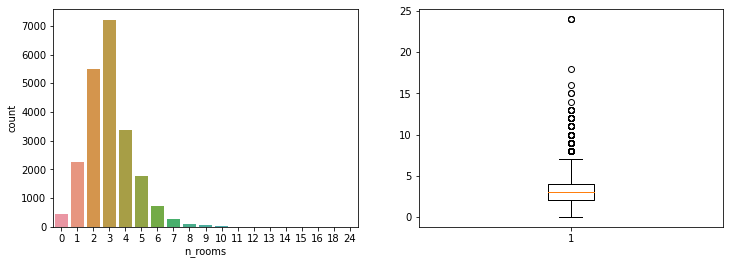

In [10]:
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['n_rooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['n_rooms'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


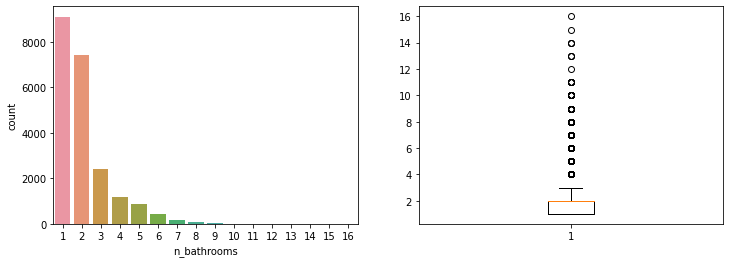

In [11]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['n_bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['n_bathrooms'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


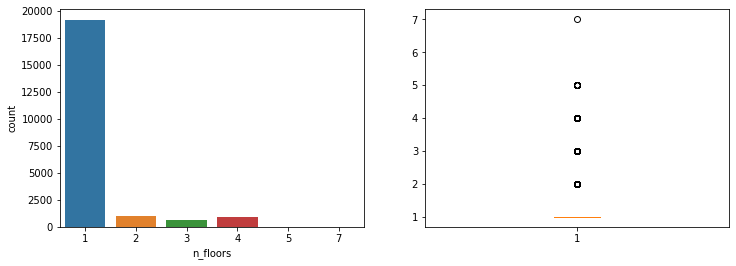

In [12]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['n_floors'])

f.add_subplot(1,2,2)
plt.boxplot(df['n_floors'])
plt.show()

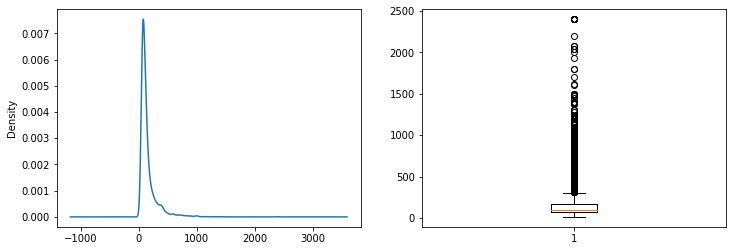

In [13]:
#Univariate analysis sqft_built
#Melihat distribusi dari sqft_built
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sq_mt_built'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sq_mt_built'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


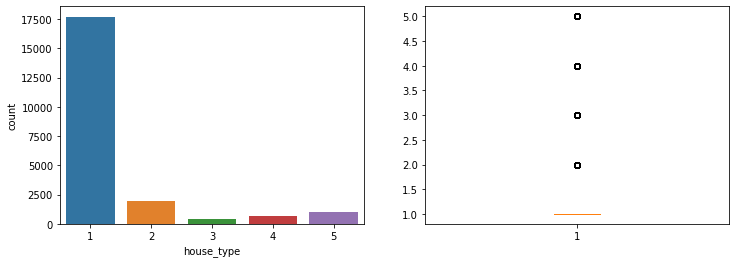

In [14]:
#Univariate analysis hoouse type
#Melihat distribusi dari house type
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['house_type'])

f.add_subplot(1,2,2)
plt.boxplot(df['house_type'])
plt.show()

<Figure size 720x576 with 0 Axes>

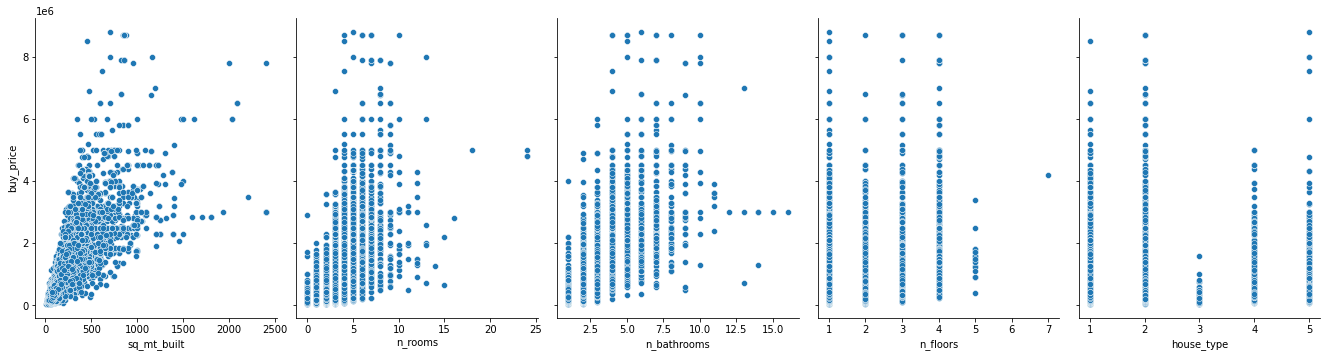

In [15]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['sq_mt_built','n_rooms','n_bathrooms','n_floors','house_type'], y_vars=['buy_price'], height=5, aspect=0.75)
plt.show()

### KORELASI

(0.0, 10133235.97682091)

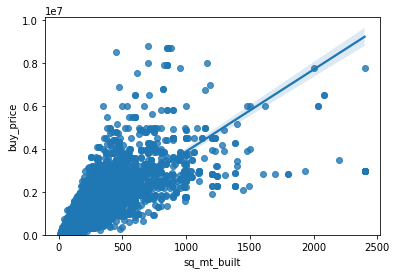

In [16]:
sns.regplot(x="sq_mt_built", y="buy_price", data=df)
plt.ylim(0,)

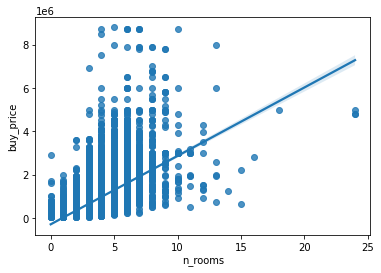

In [17]:
sns.regplot(x="n_rooms", y="buy_price", data=df)

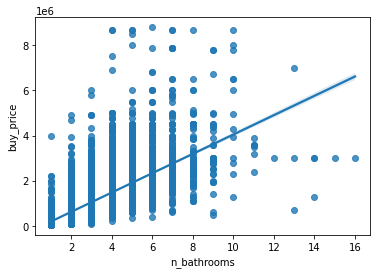

In [18]:
sns.regplot(x="n_bathrooms", y="buy_price", data=df)

(0.0, 9238200.0)

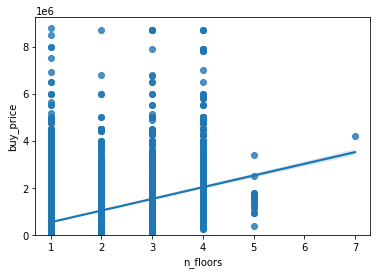

In [19]:
sns.regplot(x="n_floors", y="buy_price", data=df)
plt.ylim(0,)

(0.0, 9238200.0)

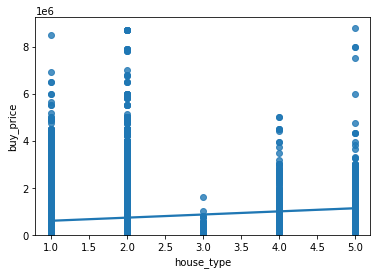

In [20]:
sns.regplot(x="house_type", y="buy_price", data=df)
plt.ylim(0,)

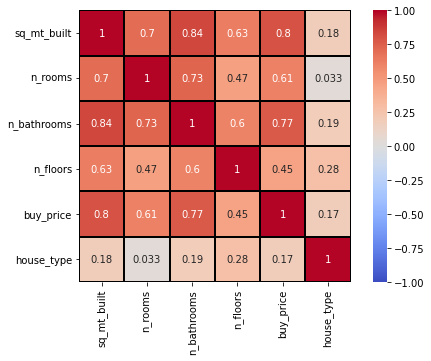

In [21]:
#Visualisasi Heatmap
fig=plt.gcf()
fig.set_size_inches(8,5)
fig=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False,vmin=-1,vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [22]:
# import library scipy
from scipy import stats

# menghitung koefisien korelasi pearson dari built dan price
pearson_coef, p_value = stats.pearsonr(df['sq_mt_built'], df['buy_price'])
print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.80452074637963


In [23]:
# menghitung koefisien korelasi pearson dari built dan price
pearson_coef, p_value = stats.pearsonr(df['n_rooms'], df['buy_price'])
print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.6097848466568092


In [24]:
df[["sq_mt_built","buy_price"]].corr()

,sq_mt_built,buy_price
sq_mt_built,1.000000,0.804521
buy_price,0.804521,1.000000


###MODELLING

In [25]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [26]:
#Pertama, buat variabel x dan y
x = df.drop(columns='buy_price')
y = df['buy_price']

In [27]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [28]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [29]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print('Coefficients : ', lin_reg.coef_)
print('Intercept : ' , lin_reg.intercept_)

Coefficients :  [   2712.9289054     8395.94660284  200236.80913223 -166396.13834074
   34368.5407077 ]
Intercept :  -51923.824414750794


In [31]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,sq_mt_built,2712.928905
1,n_rooms,8395.946603
2,n_bathrooms,200236.809132
3,n_floors,-166396.138341
4,house_type,34368.540708


In [32]:
y_pred = lin_reg.predict(x_test)

In [37]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head()

,Actual,Predicted
8406,240000,258507.539325
5705,168000,206704.730236
5804,345000,534963.517695
3347,320000,217299.285971
17477,490000,361341.677844


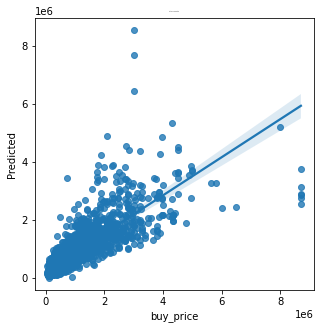

In [38]:
plt.figure(figsize=(5,5))
plt.title("Actual vs Predicted", fontsize=1)
plt.xlabel("Actual",fontsize=10)
plt.ylabel("Predicted", fontsize=10)
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [33]:
#Mencari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.6829030980939113

In [34]:
#Prediksi harga rumah
#Sq_mt_built = 100
#n_rooms = 2
#n_bathrooms = 2
#n_floors = 1
#house_type = 1
lin_reg.predict([[100,2,2,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([504606.97996271])

In [35]:
#Prediksi harga rumah
#Sq_mt_built = 70
#n_rooms = 3
#n_bathrooms = 1
#n_floors = 1
#house_type = 1
lin_reg.predict([[70.0,3,1,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([231378.25027121])

In [36]:
from sklearn.metrics import r2_score

test_y_ = lin_reg.predict(x_test)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("Root Mean Squared Error (RMSE) : %.2f" % np.sqrt(np.mean((test_y_ - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Mean absolute error (MAE): 226806.92
Residual sum of squares (MSE): 205299166576.75
Root Mean Squared Error (RMSE) : 453099.51
R2-score: 0.50
